In [31]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#to access our implemented ML functions
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [32]:
from implementations import *

In [33]:
Energy_range = [0.1, 0.2, 0.3, 0.5, 1.0, 2.0, 3.0, 5.0, 10.0, 20.0]
data_path = data_file(20.0)

In [34]:
df = build_df(data_path)

In [35]:
Energy_range_tot =  [0.2, 0.3, 0.5, 1.0, 2.0, 3.0, 5.0, 10.0, 20.0]
Energy_range =  []
datapath = data_file(20.0)
#datapath = data_file(0.1)
data_E = build_df(datapath)
data_E = clean_df(data_E)
data = data_E
for E in Energy_range:
    datapath = data_file(E)
    data_E = build_df(datapath)
    data_E = clean_df(data_E)
    print(E)
    data = pd.concat([data,data_E])

## Building of clean dataframe

In [36]:
data.shape[0]

721043

In [37]:
X, y = creation_array(data)

## Some plots of the data :

In [38]:
X[:,0].shape

(721042,)

In [39]:
y[:,1].shape

(721042,)

In [40]:
x_plot = X[:,6]
#We wand to plot the Energy that is at position 1 in y
y_plot = y[:,1]
#we want now the cos_teta :
#y_plot = y[:,2]
#for the distance : 
#y_plot = y[:,3]

len(y_plot)

721042

In [41]:
len(x_plot)

721042

In [42]:
(y[:,2]<0).sum()

17601

In [43]:
#plot only for no emission : 
idx_noemission = y[:,3]==1
y_to_plot = y_plot[idx_noemission]
X_to_plot = x_plot[idx_noemission]

len(y_to_plot)/len(x_plot)*100

25.329592450925187

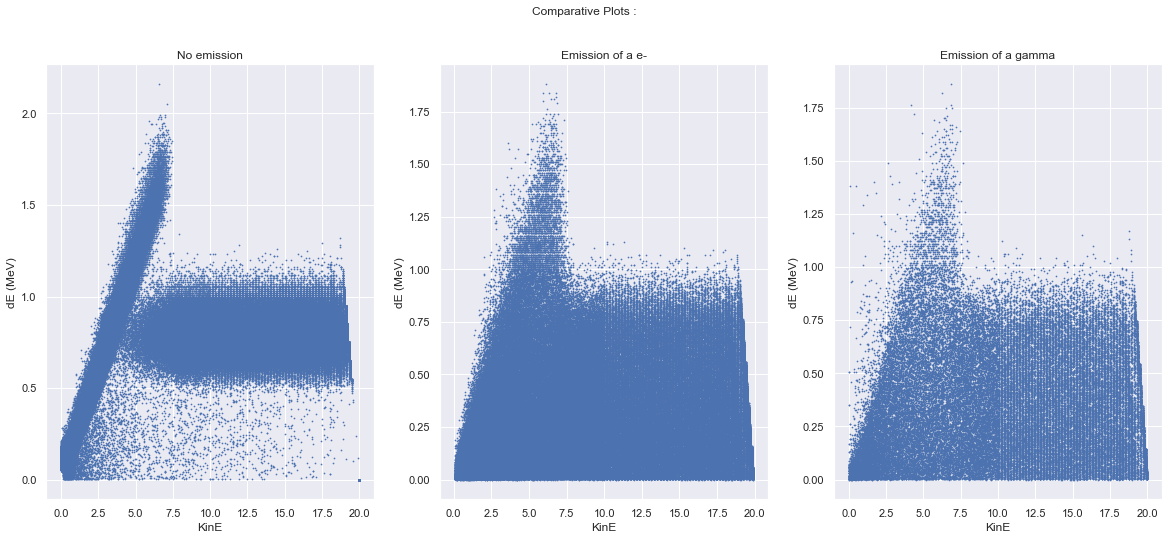

In [44]:
fig, axes = plt.subplots(1,3)
fig.suptitle('Comparative Plots : ')

for i in range(3):
    idx_noemission = y[:,3]==i
    y_to_plot = y_plot[idx_noemission]
    X_to_plot = x_plot[idx_noemission]
    
    axes[i].scatter(X_to_plot, y_to_plot, s = 0.5)
    axes[i].set_xlabel('KinE')
    axes[i].set_ylabel('dE (MeV)')
axes[0].set_title("No emission")
axes[1].set_title("Emission of a e-")
axes[2].set_title("Emission of a gamma")
fig.set_figwidth(20)
fig.set_figheight(8)  
plt.show()

In [45]:
idx_0 = y[:,3]==0
print(np.floor(x_plot[idx_0].shape[0]/8.25))

idx_1 = y[:,3]==1
print(np.floor(x_plot[idx_1].shape[0]/3.12))

idx_2 = y[:,3]==2
print(x_plot[idx_2].shape[0])

58373.0
58537.0
56825


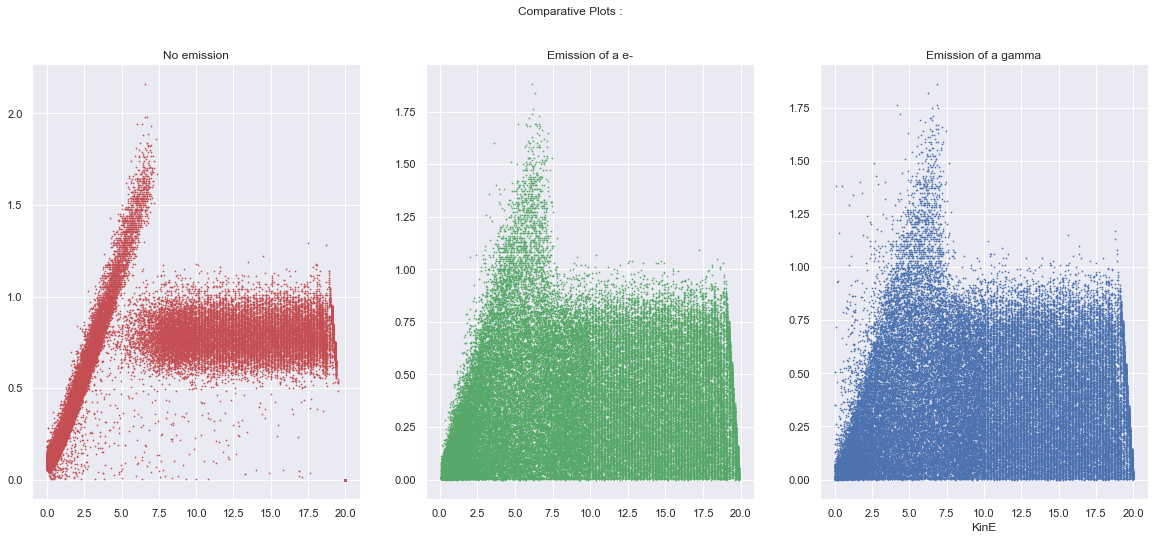

In [46]:
fig, axes = plt.subplots(1,3)
fig.suptitle('Comparative Plots : ')

#no emission :
idx_0 = y[:,3]==0
y_0 = y_plot[idx_0]
y_0 = y_0[56825*0:56825*1]
X_0 = x_plot[idx_0]
X_0 = X_0[0:56825]

axes[0].scatter(X_0, y_0, s = 0.5, c = 'r')

#e- emission
idx_1 = y[:,3]==1
y_1 = y_plot[idx_1]
y_1 = y_1[0:56825]
X_1 = x_plot[idx_1]
X_1 = X_1[0:56825]

axes[1].scatter(X_1, y_1, s = 0.5, c = 'g')

#gamma emission
idx_2 = y[:,3]==2
y_2 = y_plot[idx_2]
X_2 = x_plot[idx_2]


axes[2].scatter(X_2, y_2, s = 0.5, c = 'b')




axes[0].set_title("No emission")
axes[1].set_title("Emission of a e-")
axes[2].set_title("Emission of a gamma")
plt.xlabel('KinE')
fig.set_figwidth(20)
fig.set_figheight(8)  
plt.show()

Ccl : the tendency of the curve does not change when we have the same amount of data for the emissions

### Trying to understand the classification of the emission :

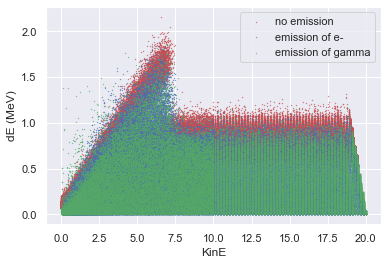

In [47]:
#We plot the energy range according to the type of emission to better understand how to classify them :
colors = ['r', 'b', 'g']
labels = ["no emission", "emission of e-", "emission of gamma"]

fig, ax = plt.subplots()

for i in range(3):
    idx_noemission = y[:,3]==i
    y_to_plot = y_plot[idx_noemission]
    X_to_plot = x_plot[idx_noemission]
    
    ax.scatter(X_to_plot, y_to_plot, c = colors[i], s = 0.1, label = labels[i])

plt.xlabel('KinE')
plt.ylabel('dE (MeV)')
ax.legend()
plt.show()

### Is it always Spawn_in_step == 1 ?

In [48]:
for E in Energy_range:
    df_check = clean_df(build_df(data_file(E)))
    Spawn_in_step = df_check[df_check.index == ':-----']['DZ']
    Spawn_in_step = Spawn_in_step.str.replace('(','',regex=True).str.replace('Rest=','',regex=True).astype('int')
    print('For Energy ', E, ' we have : ',Spawn_in_step[Spawn_in_step != 1].sum(), ' interactions that produce more than 1 one particule')

## The first step of our model will be the classification : no emission, emission of e- and emission of gamme

# Apply an ML model to see the if the classification works

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X , y[:,3], 
                                                    shuffle = True, 
                                                    test_size=0.1, 
                                                    random_state=0)

# Show the Training and Testing Data
print('Shape of training feature:', X_train.shape)
print('Shape of testing feature:', X_test.shape)
print('Shape of training label:', y_train.shape)
print('Shape of training label:', y_test.shape)

Shape of training feature: (648937, 7)
Shape of testing feature: (72105, 7)
Shape of training label: (648937,)
Shape of training label: (72105,)


## We try to train on several ML models : Decision Tree, Random Forest, Naive Bayes, K-Nearest Neighbours, Logistic Regression and Support Vector Machine (SVM)

### Decision Tree :

In [23]:
from sklearn import tree

# Building Decision Tree model 
dtc = tree.DecisionTreeClassifier(random_state=0, max_depth = 3 )
dtc.fit(X_train, y_train)

# Evaluate Model
dtc_eval = evaluate_model(dtc, X_test, y_test)

# Print result
print('Accuracy:', dtc_eval['acc'])
print('Confusion Matrix:\n', dtc_eval['cm'])

"""print('Precision:', dtc_eval['prec'])
print('Recall:', dtc_eval['rec'])
print('F1 Score:', dtc_eval['f1'])
print('Cohens Kappa Score:', dtc_eval['kappa'])
print('Area Under Curve:', dtc_eval['auc'])
print('Confusion Matrix:\n', dtc_eval['cm'])"""

Accuracy: 0.6806462797309479
Confusion Matrix:
 [[48290    32     0]
 [17290   788     0]
 [ 5455   250     0]]


"print('Precision:', dtc_eval['prec'])\nprint('Recall:', dtc_eval['rec'])\nprint('F1 Score:', dtc_eval['f1'])\nprint('Cohens Kappa Score:', dtc_eval['kappa'])\nprint('Area Under Curve:', dtc_eval['auc'])\nprint('Confusion Matrix:\n', dtc_eval['cm'])"

Très mauvaise classification car on n'arrive jamais à prédire le cas 2 !

Decision tree for a balanced weight model :

In [28]:
# Building Decision Tree balanced model 
dtc_balanced = tree.DecisionTreeClassifier(random_state=0, max_depth = 3, class_weight = 'balanced' )
dtc_balanced.fit(X_train, y_train)

# Evaluate Model
dtc_balanced_eval = evaluate_model(dtc_balanced, X_test, y_test)

# Print result
print('Accuracy:', dtc_balanced_eval['acc'])
print('Confusion Matrix:\n', dtc_balanced_eval['cm'])

Accuracy: 0.46916302614243116
Confusion Matrix:
 [[28850     0 19472]
 [ 2854     0 15224]
 [  726     0  4979]]


0 good prediction for the class e- ! -> nul

### Random foerst


Attention : un peu long à run !!! --> ET MARCHE MOINS BIEN DONC PAS FOU 

In [29]:
from sklearn.ensemble import RandomForestClassifier

# Building Random Forest model 
rf = RandomForestClassifier(random_state=0, max_depth = 3)
rf.fit(X_train, y_train)

# Evaluate Model
rf_eval = evaluate_model(rf, X_test, y_test)

# Print result
print('Accuracy:', rf_eval['acc'])
print('Confusion Matrix:\n', rf_eval['cm'])

Accuracy: 0.6716177796269329
Confusion Matrix:
 [[48319     3     0]
 [17970   108     0]
 [ 5674    31     0]]


Random forest for a balanced weight model :

In [31]:
# Building Random Forest balanced model 
rf_balanced = RandomForestClassifier(random_state=0, max_depth = 3, class_weight = 'balanced')
rf_balanced.fit(X_trabin, y_train)

# Evaluate Model
rf_balanced_eval = evaluate_model(rf_balanced, X_test, y_test)

# Print result
print('Accuracy:', rf_balanced_eval['acc'])
print('Confusion Matrix:\n', rf_balanced_eval['cm'])

Accuracy: 0.4762915193121143
Confusion Matrix:
 [[27531  3815 16976]
 [ 2532  2413 13133]
 [  651   655  4399]]


Le banced model marche bien relativement of course

### Naive Bayes

In [24]:
from sklearn.naive_bayes import GaussianNB

# Building Naive Bayes model 
nb = GaussianNB()
nb.fit(X_train, y_train)

# Evaluate Model
nb_eval = evaluate_model(nb, X_test, y_test)

# Print result
print('Accuracy:', nb_eval['acc'])
print('Confusion Matrix:\n', nb_eval['cm'])

Accuracy: 0.6165730531863255
Confusion Matrix:
 [[32066 16256     0]
 [ 5686 12392     0]
 [ 1506  4199     0]]


Pas fou non-plus les résultats --> s'execute vite

###  K-Nearest Neighbours

In [25]:
from sklearn.neighbors import KNeighborsClassifier

# Building KNN model 
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Evaluate Model
knn_eval = evaluate_model(knn, X_test, y_test)

# Print result
print('Accuracy:', knn_eval['acc'])
print('Confusion Matrix:\n', knn_eval['cm'])

/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Accuracy: 0.6751820262117745
Confusion Matrix:
 [[41923  6078   321]
 [11185  6531   362]
 [ 3573  1902   230]]


Accuracy pas incroyable mais au moins on a des prédictions de gamma !!!

### Logistic regression

Probably need to optimise the parameter to choose !

I tested with 'none' and with 'l2' penalty but it doesn't change the accuracy !

In [26]:
from sklearn.linear_model import LogisticRegression

# Building Logistic regression model 
reg = LogisticRegression(multi_class='ovr', penalty = 'none')
reg.fit(X_train, y_train)

# Evaluate Model
log_eval = evaluate_model(reg, X_test, y_test)

# Print result
print('Accuracy:', log_eval['acc'])
print('Confusion Matrix with no penalty:\n', log_eval['cm'])


Accuracy: 0.6741696137577144
Confusion Matrix with no penalty:
 [[48322     0     0]
 [17789   289     0]
 [ 5606    99     0]]


Logistic regression for balanced weights model : 

In [27]:
reg_balanced = LogisticRegression(multi_class='ovr', penalty = 'none', class_weight = 'balanced' )
reg_balanced.fit(X_train, y_train)

# Evaluate Model
log_balanced = evaluate_model(reg_balanced, X_test, y_test)

# Print result
print('Accuracy:', log_balanced['acc'])
print('Confusion Matrix with no penalty:\n', log_balanced['cm'])

Accuracy: 0.5653560779418902
Confusion Matrix with no penalty:
 [[27341 18805  2176]
 [ 3791 12766  1521]
 [  998  4049   658]]


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Support Vector Machine (SVM)

ATTENTION ! kinda long to run bruh --> A jamais run et a juste fait surchauffer mon ordi :( !!

In [ ]:
"""from sklearn.svm import SVC

# Building SVM model 
svc = SVC()
svc.fit(X_train, y_train)

# Evaluate Model
svc_eval = evaluate_model(svc, X_test, y_test)

# Print result
print('Accuracy:', svc_eval['acc'])
print('Confusion Matrix with no penalty:\n', svc_eval['cm'])

"""

## Model comparaison 

/var/folders/yl/4_xhz_y92px_c574xx1xql680000gn/T/ipykernel_12130/1218605611.py:55: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(labels)
/var/folders/yl/4_xhz_y92px_c574xx1xql680000gn/T/ipykernel_12130/1218605611.py:56: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(labels)
/var/folders/yl/4_xhz_y92px_c574xx1xql680000gn/T/ipykernel_12130/1218605611.py:57: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(labels)
/var/folders/yl/4_xhz_y92px_c574xx1xql680000gn/T/ipykernel_12130/1218605611.py:58: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax4.set_xticklabels(labels)


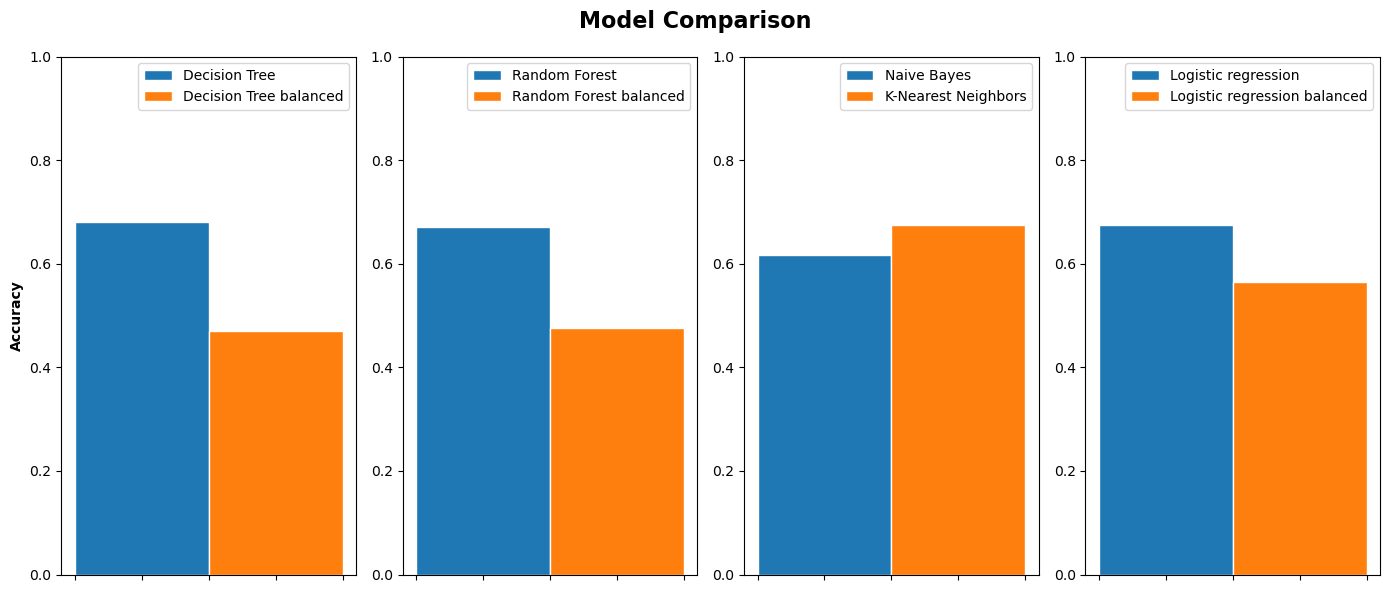

In [61]:
# Intitialize figure with two plots
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4)
fig.suptitle('Model Comparison', fontsize=16, fontweight='bold')
fig.set_figheight(6)
fig.set_figwidth(14)
fig.set_facecolor('white')

"""
gs = fig.add_gridspec(1, 4, hspace=0, wspace=0)
(ax1, ax2, ax3, ax4) = gs.subplots(sharex='col', sharey='row')
"""

# First plot
## set bar size
barWidth = 0.2
dtc_score = [dtc_eval['acc']]
rf_score = [rf_eval['acc']]
nb_score = [nb_eval['acc']]
knn_score = [knn_eval['acc']]

dtc_balanced_score = [dtc_balanced_eval['acc']]
rd_balanced_score = [rf_balanced_eval['acc']]
log_score = [log_eval['acc']]
log_balanced_score = [log_balanced['acc']]



## Set position of bar on X axis
r1 = np.arange(len(dtc_score))
r2 = [x + barWidth for x in r1]



## Make the plot
ax1.bar(r1, dtc_score, width=barWidth, edgecolor='white', label='Decision Tree')
ax1.bar(r2, dtc_balanced_score, width=barWidth, edgecolor='white', label='Decision Tree balanced')

ax2.bar(r1, rf_score, width=barWidth, edgecolor='white', label='Random Forest')
ax2.bar(r2, rd_balanced_score, width=barWidth, edgecolor='white', label='Random Forest balanced')

ax3.bar(r1, nb_score, width=barWidth, edgecolor='white', label='Naive Bayes')
ax3.bar(r2, knn_score, width=barWidth, edgecolor='white', label='K-Nearest Neighbors')

ax4.bar(r1, log_score, width=barWidth, edgecolor='white', label='Logistic regression')
ax4.bar(r2, log_balanced_score, width=barWidth, edgecolor='white', label='Logistic regression balanced')


ax1.sharey(ax2)
ax2.sharey(ax3)
ax3.sharey(ax4)


## Configure x and y axis
#ax1.set_xticks([r + (barWidth * 1.5) for r in range(len(dtc_score))], )
ax1.set_xticklabels(labels)
ax2.set_xticklabels(labels)
ax3.set_xticklabels(labels)
ax4.set_xticklabels(labels)


ax1.set_ylabel('Accuracy', fontweight='bold')
ax1.set_ylim(0, 1)

## Create legend & title
ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()



plt.show()

# Model optimiztion ?

### Very early `least_square` to check that the data is ready for ML processing

## Étude de données

<AxesSubplot:xlabel='KinE(MeV)', ylabel='Count'>

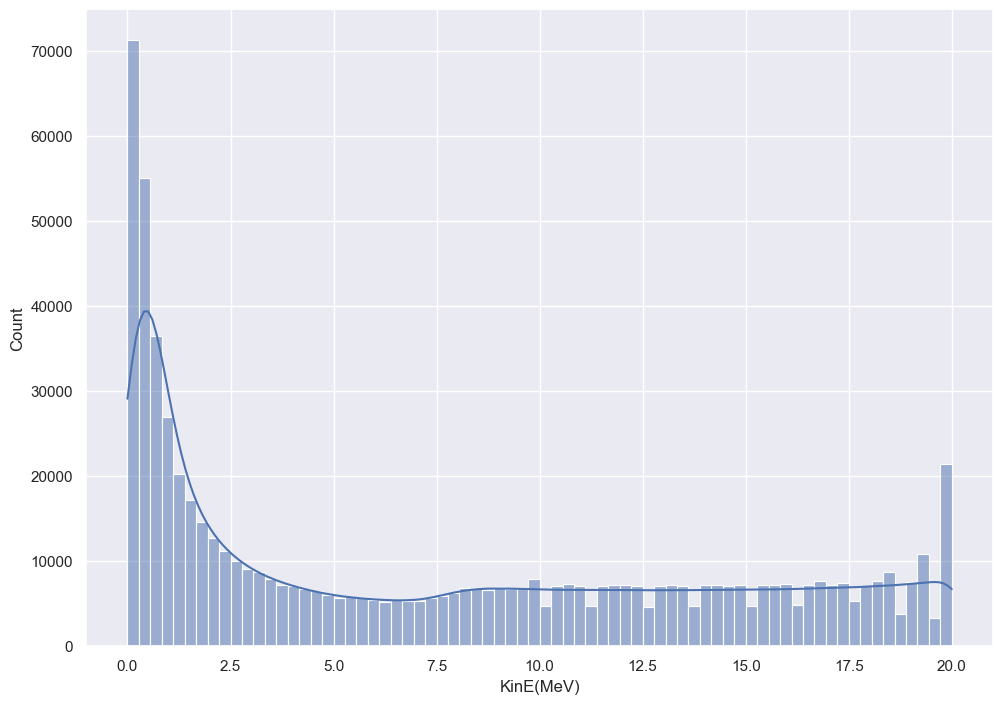

In [15]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
dataplot = df
dataplot = dataplot[dataplot['KinE(MeV)'] != 0]
sns.histplot(data=dataplot, x="KinE(MeV)", kde=True)

<AxesSubplot:xlabel='StepLeng', ylabel='Count'>

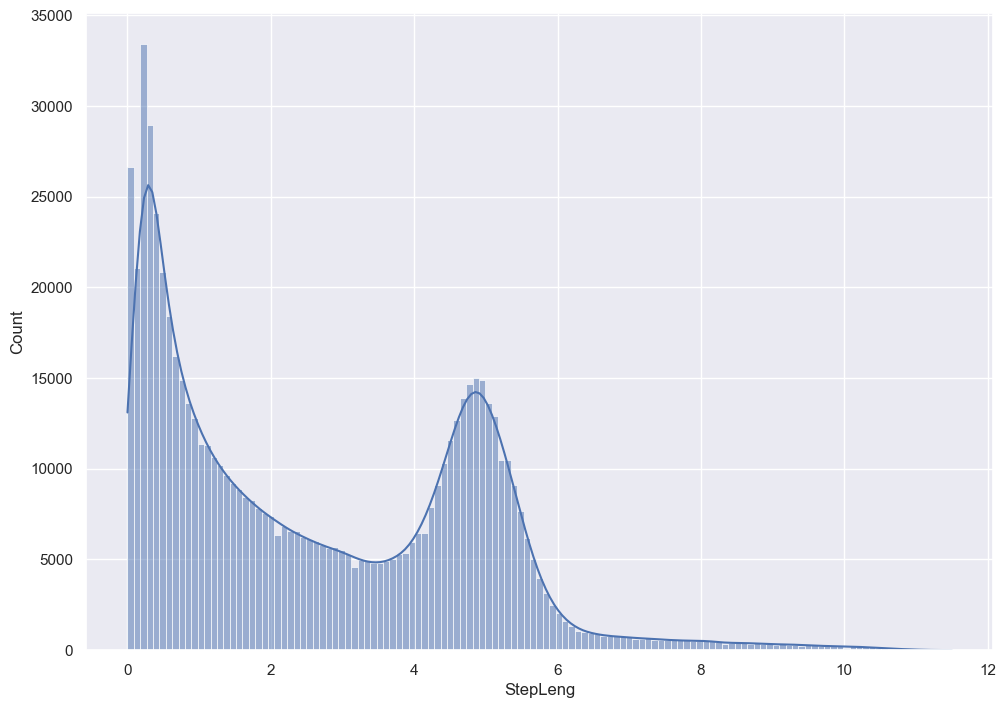

In [16]:
sns.histplot(data=dataplot, x="StepLeng", kde=True)

In [51]:
Energy_range = [0.1, 0.2, 0.3, 0.5, 1.0, 2.0, 3.0, 5.0, 10.0, 20.0]
data_path = data_file(20.0)
df = clean_df(build_df(data_path))

In [ ]:
data = []

for E in Energy_range:
    datapath = data_file(E)
    data_E = clean_df(build_df(datapath))
    data.append(data_E)
    print(E)
    
data = pd.concat(data)

## Plots

In [60]:
#remove index column + step 0
df_plot=df[df['index'] !=0]
dataplot = df_plot[df_plot['KinE(MeV)'] != 0]

<AxesSubplot:xlabel='DX', ylabel='Count'>

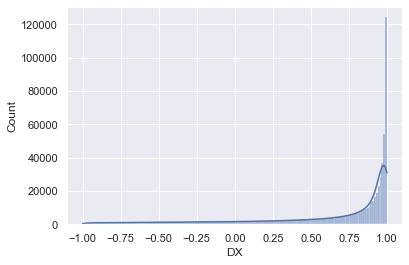

In [61]:
sns.histplot(data=dataplot, x="DX", kde=True)

<AxesSubplot:xlabel='DY', ylabel='Count'>

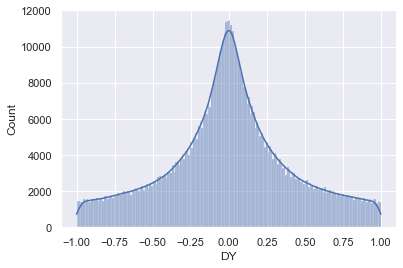

In [62]:
sns.histplot(data=dataplot, x="DY", kde=True)

<AxesSubplot:xlabel='DZ', ylabel='Count'>

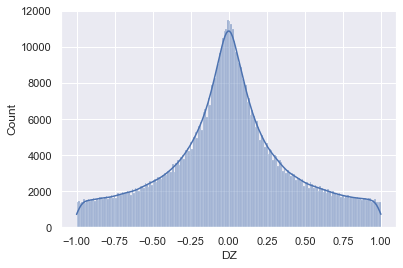

In [63]:
sns.histplot(data=dataplot, x="DZ", kde=True)

<AxesSubplot:xlabel='X(mm)', ylabel='Count'>

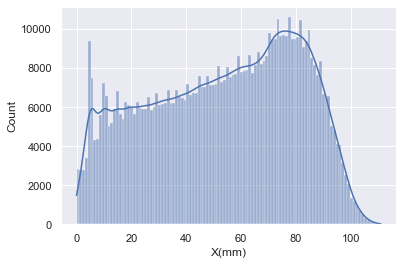

In [64]:
sns.histplot(data=dataplot, x="X(mm)", kde=True)

#### DX,DY,DZ distribution
DY et DZ follow a similar normal distribution -> Isotropic

<AxesSubplot:xlabel='Y(mm)', ylabel='Count'>

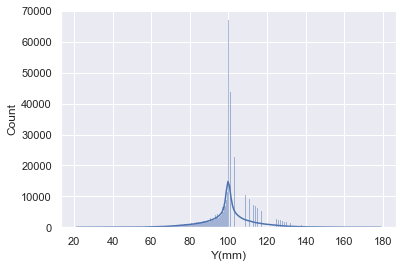

In [65]:
sns.histplot(data=dataplot, x="Y(mm)", kde=True)

<AxesSubplot:xlabel='Z(mm)', ylabel='Count'>

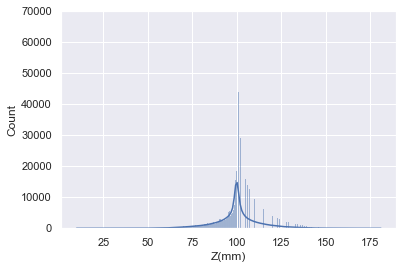

In [66]:
sns.histplot(data=dataplot, x="Z(mm)", kde=True)

<AxesSubplot:>

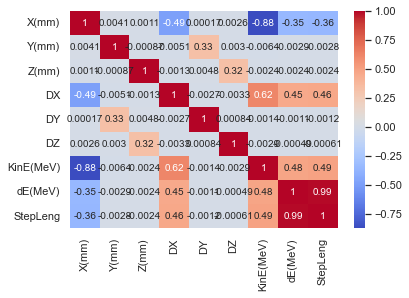

In [68]:
df_heatmap=df_plot.iloc[:,1:10]
sns.heatmap(df_heatmap.corr(), annot = True, fmt='.2g',cmap= 'coolwarm')


#### dE and StepLeng correlation
Correlation of 0.99 between the features -> Correlated features, in general, don’t improve models but they affect specific models in different ways and to varying extents. It is clear that correlated features means that they bring the same information, so it is logical to remove one of them
-> We should remove one of the columns

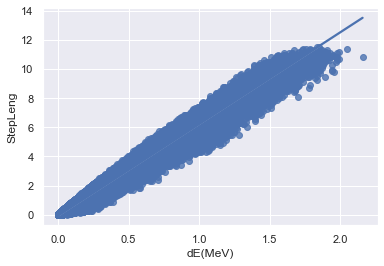

In [69]:
sns.regplot(x="dE(MeV)", y="StepLeng", data=df_heatmap);

<AxesSubplot:xlabel='X(mm)', ylabel='KinE(MeV)'>

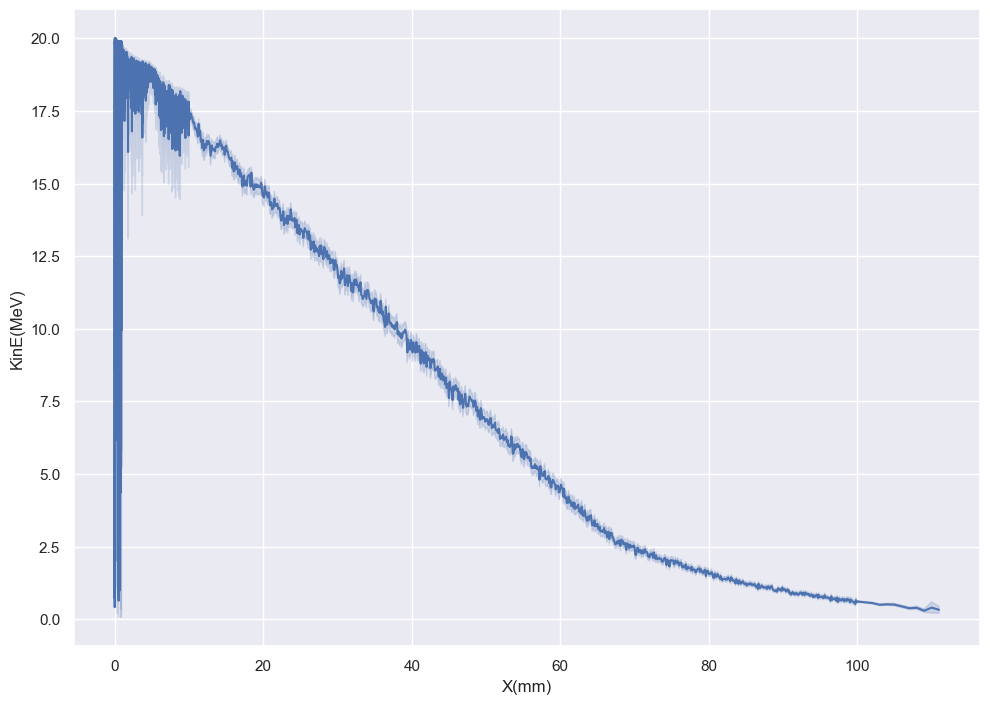

In [28]:
sns.lineplot(data=dataplot, x="X(mm)", y="KinE(MeV)")


<AxesSubplot:xlabel='Y(mm)', ylabel='KinE(MeV)'>

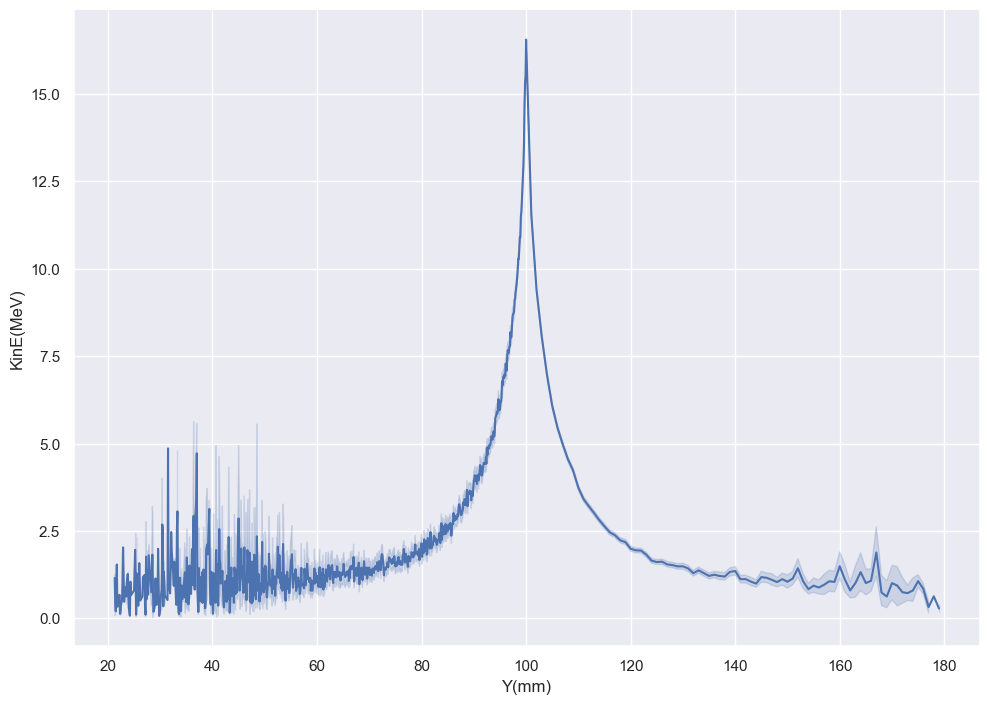

In [30]:
sns.lineplot(data=dataplot, x="Y(mm)", y="KinE(MeV)")


<AxesSubplot:xlabel='StepLeng', ylabel='KinE(MeV)'>

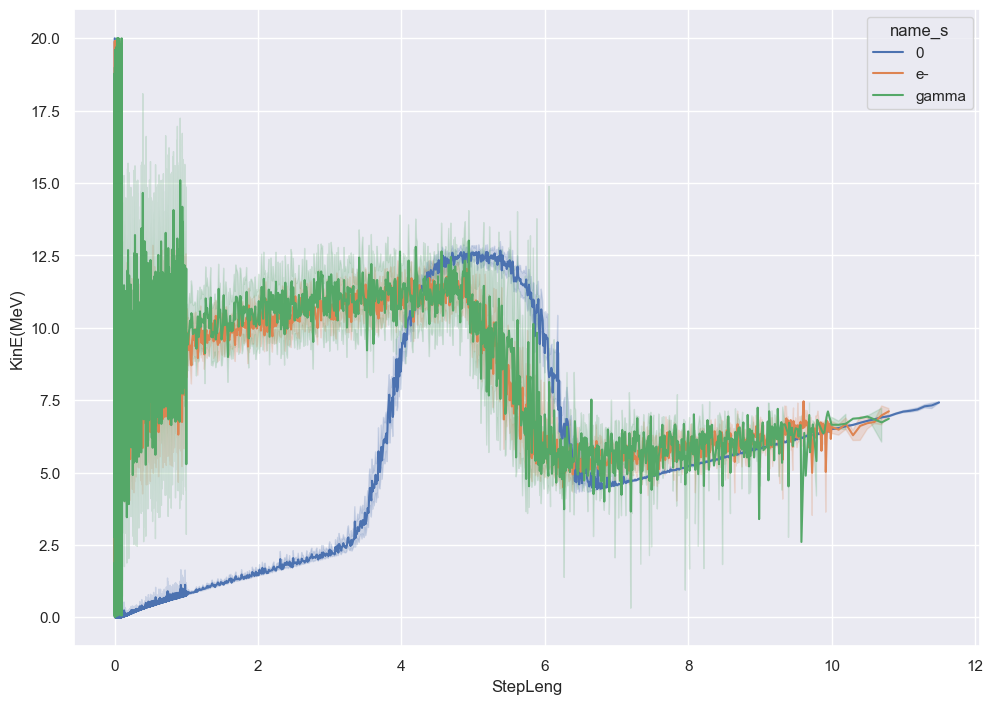

In [29]:
#Attention, prend du temps
sns.lineplot(data=df, x="StepLeng", y="KinE(MeV)",hue="name_s")
